In [2]:
%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
#how did you get these expressions / finite difference method
def deriv2(f, dx):
                    #f(x+h) - 2(f(x) +f(x-h) / dx^2
    fprimeprime = (f[2:] - 2*f[1:-1] + f[0:-2])/dx**2
    return fprimeprime
def deriv1(f, dx):
    #           f(x+h) - f(x)/dx
    #           only looks at right
    #           center derivative
                #f(x+h) - f(x-h)
                #may cause red blakc instability
    fprime = (f[2:] - f[0:-2])/ (2*dx)
    #starting from third element - all elements except first and last, why??
    return fprime

In [9]:
def solution(t,x):
    #known solution to equation - analytical
    f = np.exp(-(t-x)**2)
    #-(t-x)^2
    return f

def initial_data(x):
    f = np.exp(-x**2) 
    #-x^2, sol'n at t=0
    fprime = 2.*x*np.exp(-x**2) 
    #time derivative of f = 2x*-x^2
    return np.array([f,fprime]) 

def rhs(t, f): #right hand side
    dt_phi = np.zeros_like(f[0])
    #f[0] = phi, f[1] = psi
    dt_phi[1:-1] = f[1][1:-1]
    #dt_phi = psi
    
    dt_psi = np.zeros_like(f[1])
    dt_psi[1:-1] = deriv2(f[0], dx)
    #dt_psi = dx^2 phi

    return np.array([dt_phi, dt_psi])

In [6]:
x = np.linspace(-3., 3., 20)
dx = x[1] - x[0]

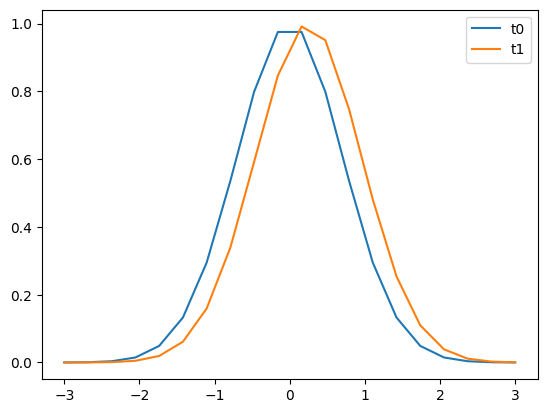

In [10]:
#are these separate times
t0 = 0.
t1 = 0.25
plt.plot(x, solution(t0, x), label="t0")
plt.plot(x, solution(t1, x), label="t1")
plt.legend();

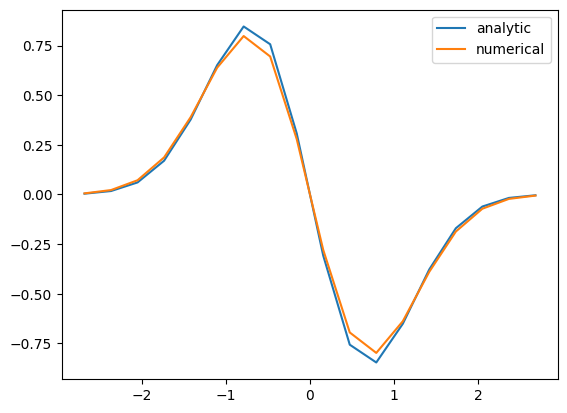

In [11]:
# 1st deriv of my solution test function (form Mathematica / Maple is) at t=0:
# -2*x*exp(-x**22)
fprime = -2.*x*np.exp(-x**2)
sol0 = solution(0., x)
numderiv1 = deriv1(sol0, dx)
plt.plot(x[1:-1], fprime[1:-1], label="analytic")
plt.plot(x[1:-1], numderiv1, label="numerical")
plt.legend();

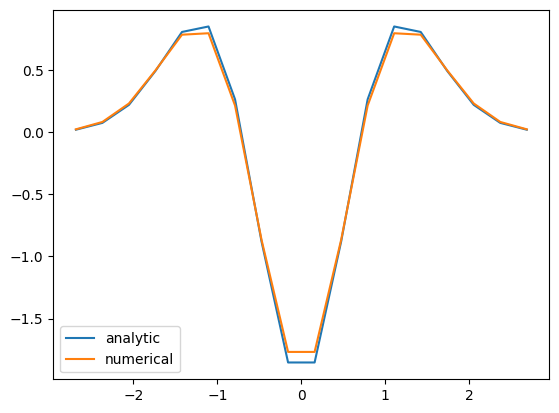

In [12]:
# 2nd deriv of my solution test function (form Mathematica / Maple is) at t=0:
# -2*exp(-x^2)+4*x^2*exp(-x^2)
fprimeprime = -2.*np.exp(-x**2)+4*x**2*np.exp(-x**2)
sol0 = solution(0., x)
numderiv2 = deriv2(sol0, dx)
plt.plot(x[1:-1], fprimeprime[1:-1], label="analytic")
plt.plot(x[1:-1], numderiv2, label="numerical")
plt.legend();

In [13]:
# apply a boundary condtion at end points where derivatives cannot be computed
def dirichlet_boundary_condition(f):
    fout = f.copy()
    # set phi to zero at bondary
    fout[0][0] = 0.
    fout[0][-1] = 0.
    # set psi to zero at bondary -> phi stays zero
    fout[1][0] = 0.
    fout[1][-1] = 0.
    return fout

# apply a boundary condtion at end points where derivatives cannot be computed

#periodic will just loop back around
def periodic_boundary_condition(f):
    fout = f.copy()
    # periodic boundary conditions
    fout[0][0] = f[0][-2]
    fout[0][-1] = f[0][1]
    # set psi to zero at boundary -> phi stays zero
    fout[1][0] = f[1][-2]
    fout[1][-1] = f[1][1]
    return fout

boundary_condition = dirichlet_boundary_condition

# do a single RK2 method step
def rk2step(f, rhs, t, dt):
    k1 = rhs(t, f)
    f1 = f + 1./2.*dt*k1
    f1 = boundary_condition(f1)
    
    #f(all)
    k2 = rhs(t + 1./2.*dt, f1)
    #yn+1 = yn + hf*f(all)
    f2 = f + dt * k2
    f2 = boundary_condition(f2)
    return f2


def rk4step(f, rhs, t, dt):
    #k1 = rhs(t, f)
    k1 = rhs(t, f)
    #f1 = f + 1./2.*dt*k1  
    #f1 = boundary_condition(f1)
    
    
    f2 = f + (dt*1/2*k1)
    f2 = boundary_condition(f2)
    #k2 = f(t+h/2, yn + h*k1/2)
    k2 = rhs(t + 1./2.*dt, f2)


    f3 = f + (dt*1/2*k2)
    f3 = boundary_condition(f3)
    #k2 = f(t+h/2, yn + h*k1/2)
    k3 = rhs(t + 1./2.*dt, f3)

    f4 = f + (dt*k3)
    f4 = boundary_condition(f4)
    #k2 = f(t+h/2, yn + h*k1/2)
    k4 = rhs(t + dt, f4)

    final = f + 1/6*(k1 + 2*k2 + 2*k3 + k4)*dt

    return final

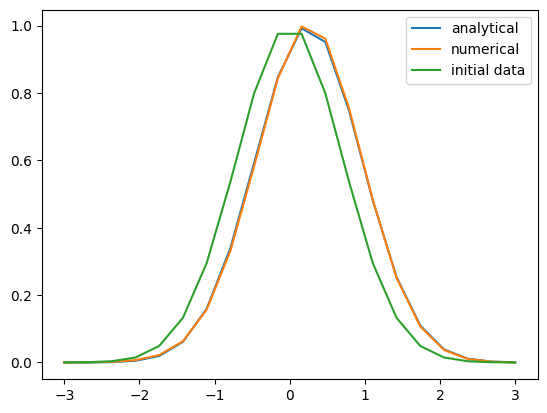

In [55]:
# test RK2 code
dt = 0.25

t0 = 0.
f0 = initial_data(x)

t1 = t0 + dt
f1 = rk2step(f0, rhs, t0, dt)

plt.plot(x, solution(t1, x), label="analytical")
plt.plot(x, f1[0], label="numerical")
plt.plot(x, f0[0], label="initial data")
plt.legend();

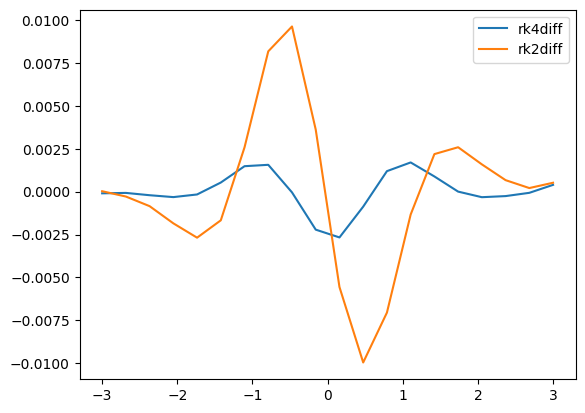

In [14]:
dt = 0.25

t0 = 0.
f0 = initial_data(x)

t1 = t0 + dt
f1 = rk4step(f0, rhs, t0, dt)
f1rk2 = rk2step(f0, rhs, t0, dt)

diff4 = solution(t1, x) - f1[0]
diff2 = solution(t1, x) - f1rk2[0]

# plt.plot(x, solution(t1, x), label="analytical")
# plt.plot(x, f1[0], label="numerical")
# plt.plot(x, f0[0], label="initial data")
plt.plot(x, diff4, label = "rk4diff")
plt.plot(x, diff2, label = "rk2diff")
#rk4 sreal answer + error, scales s step size ^4 power
plt.legend();

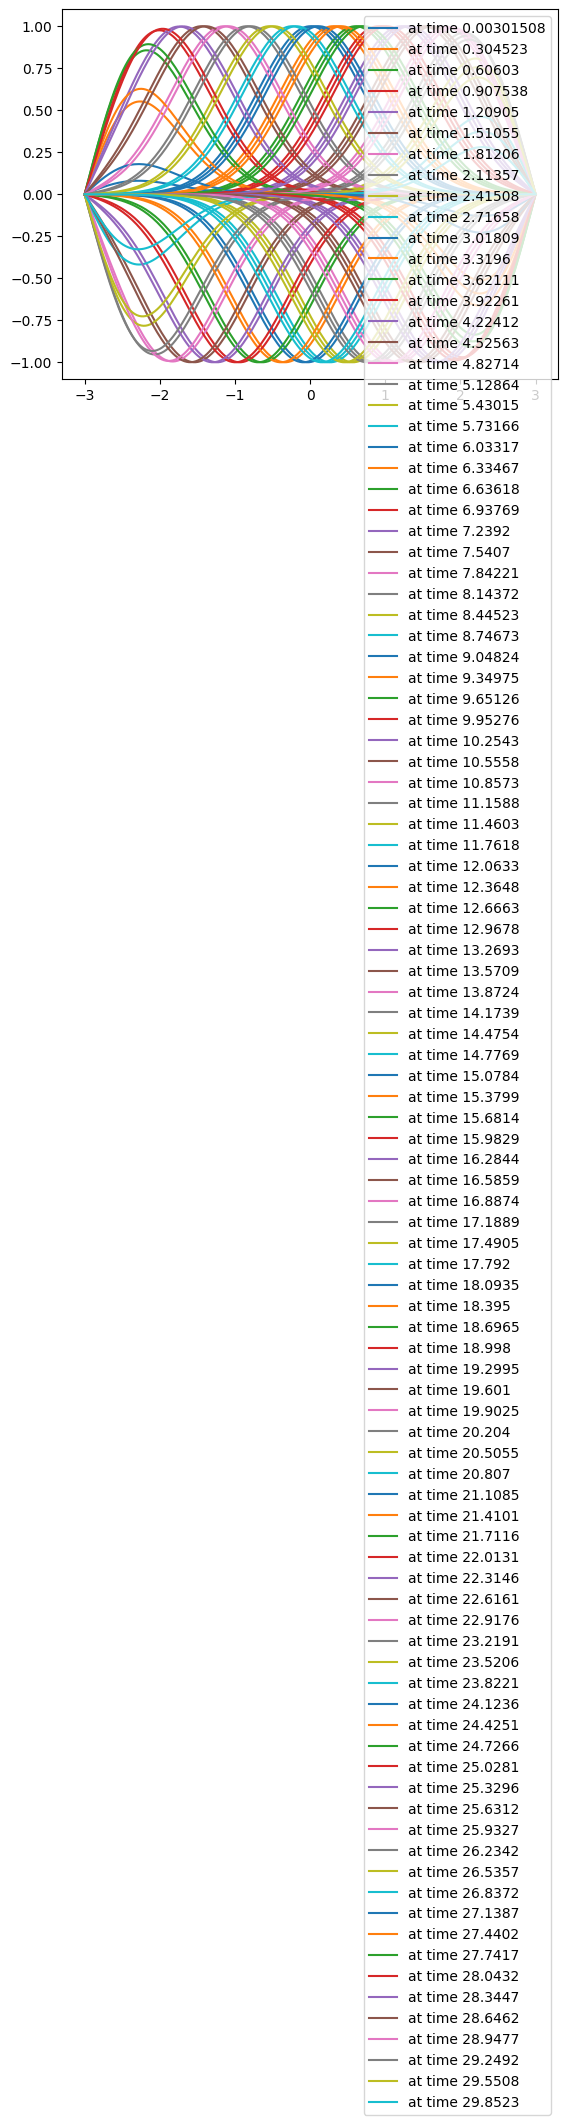

In [16]:
# now to the thing again for real...

# start and end time
t0 = 0.
t1 = 30

# grid
x = np.linspace(-3., 3., 200)

# grid spacing
dx = x[1] - x[0]

# time step
dt = dx/10. # this must be "small enough"

t = t0
f = initial_data(x)
it = 0
while (t < t1):
    fnext = rk4step(f, rhs, t, dt)
    #og rk2step

    t += dt
    f = fnext
    
    if(it % 100 == 0):
        plt.plot(x, f[0], label="at time %g" % t)
    it += 1
plt.legend(loc='best');